In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [239]:
# number of classes
K = 5
# sequence length 
N = 50

In [240]:
def softmax(x):
	return np.exp(x)/(np.sum(np.exp(x), axis=0))

In [241]:
def chain_markov(C, K, N):
	# correlaction factor, controls dependence between time steps 
	x = np.zeros((K,N))
	x[0,0] = 1 
	for i in range(N-1):
		steps = np.random.randint(0, 20, K)
		x[:,i+1] = (C*x[:,i]+softmax(steps))/(C+1)
	return x

In [242]:
def chain_random(K, N):
	x = np.random.randn(K, N)
	x = softmax(x)
	return x

In [243]:
def chain_shift(K, N, eps=0.05):
	x = np.zeros((K,N))
	x[0,0] = 1 
	for i in range(N-1):
		x[:,i+1] = np.roll(x[:,i], 1)
	return x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

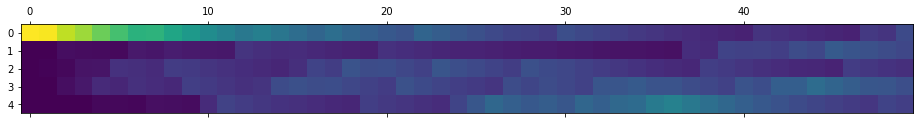

In [244]:
plt.matshow(x_a:=chain_markov(10, K, N))
x_a.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

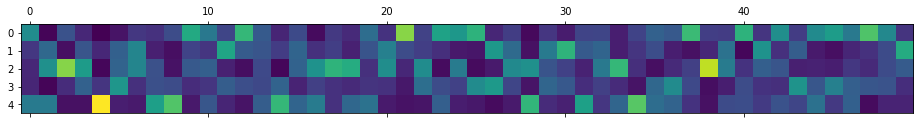

In [245]:
plt.matshow(x_b:=chain_random(K, N))
x_b.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

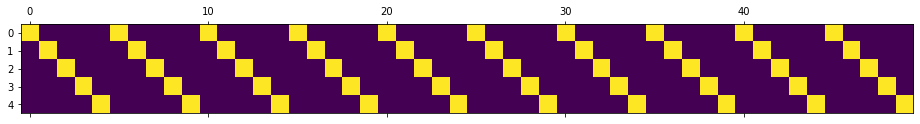

In [246]:
plt.matshow(x_c:=chain_shift(K, N))
x_c.sum(axis=0)

In [247]:
def compute_p(x):
	# compute joint distribution p(k1,k2) of neighboring sequence states 
	P = np.outer(x[:, 0], x[:, 1])
	for t in range(1, N-1):
		P += np.outer(x[:, t], x[:, t+1])
	P = P/N
	# compute marginals
	P1 = np.sum(P, axis=1)
	P2 = np.sum(P, axis=0)
	return P, P1, P2

In [248]:
def compute_mi(P, Q):
	# compute mutual information q(k1,k2) = p(k1)p(k2),  p(k1,k2) . -> MI = KL(q||p)
	I = np.sum(P*np.log(P/Q + 1e-10))
	return I

MI 0.052574233451732594


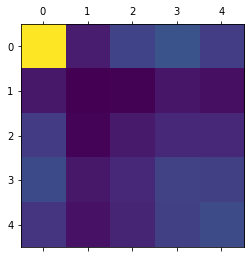

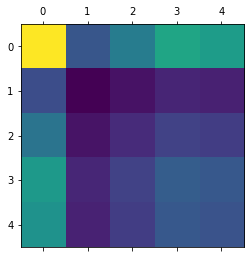

In [249]:
P, P1, P2 = compute_p(x_a)
# true joint distribution p(k1,k2)
plt.matshow(P)
# product of marginal distributions q(k1,k2) = p(k1)*p(k2)
Q = np.outer(P1, P2)
plt.matshow(Q)
print('MI', compute_mi(P, Q))

MI 0.022837317934062722


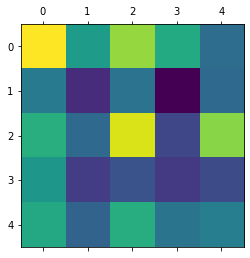

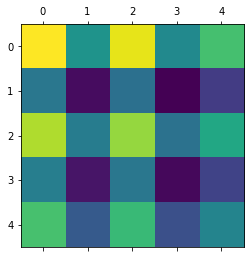

In [250]:
P, P1, P2 = compute_p(x_b)
# true joint distribution p(k1,k2)
plt.matshow(P)
# product of marginal distributions q(k1,k2) = p(k1)*p(k2)
Q = np.outer(P1, P2)
plt.matshow(Q)
print('MI', compute_mi(P, Q))

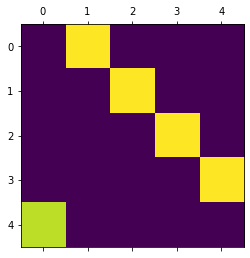

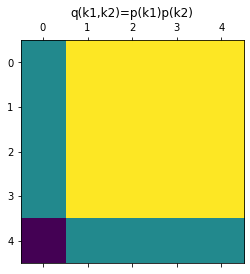

MI 1.596214047023067


In [254]:
P, P1, P2 = compute_p(x_c)
# true joint distribution p(k1,k2)
plt.matshow(P)
plt.title('q(k1,k2)=p(k1)p(k2)')
plt.show()
# product of marginal distributions q(k1,k2) = p(k1)*p(k2)
Q = np.outer(P1, P2)
plt.matshow(Q)
plt.title('q(k1,k2)=p(k1)p(k2)')
plt.show()
print('MI', compute_mi(P, Q))